In [2]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
import h5py

ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [17]:
print(h5py.__version__)

NameError: name 'h5py' is not defined

In [16]:
import os
import numpy as np
import h5py

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator 
    # Load and organize images automatically, preprocess them and create data stashes (avoiding loading the whole dataset onto the memory)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [2]:
def create_generators(train_dir, valid_dir, test_dir, img_size=(150, 150), batch_size=64):
    # img_size 150x150 due to PC performance issues
    # batch_size = how many imgs are gonna be processed together before updating the weights during the training
    """
    Configura generadores de imágenes para entrenamiento, validación y prueba.
    
    Args:
        train_dir (str):
        valid_dir (str): 
        test_dir (str): 
        img_size (tuple): Dimensiones de las imágenes (alto, ancho).
        batch_size (int): Tamaño de los lotes.

    Returns:
        train_gen, valid_gen, test_gen: Generadores para entrenamiento, validación y prueba.
    """
    # Generator for train, validation and test 
    train_datagen = ImageDataGenerator(rescale=1.0/255.0)
    valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Create generators from directories 
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    valid_gen = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    
    return train_gen, valid_gen, test_gen

In [3]:
train_dir = r'X:\CODING\PROJECTS\CAT_DOG\train'
valid_dir = r'X:\CODING\PROJECTS\CAT_DOG\valid'
test_dir = r'X:\CODING\PROJECTS\CAT_DOG\test'

train_gen, valid_gen, test_gen = create_generators(train_dir, valid_dir, test_dir)
print("")
print(f"Train: {train_gen.samples} imgs")
print(f"Validation: {valid_gen.samples} imgs")
print(f"Test: {test_gen.samples} imgs")

Found 12589 images belonging to 2 classes.
Found 1204 images belonging to 2 classes.
Found 602 images belonging to 2 classes.

Train: 12589 imgs
Validation: 1204 imgs
Test: 602 imgs


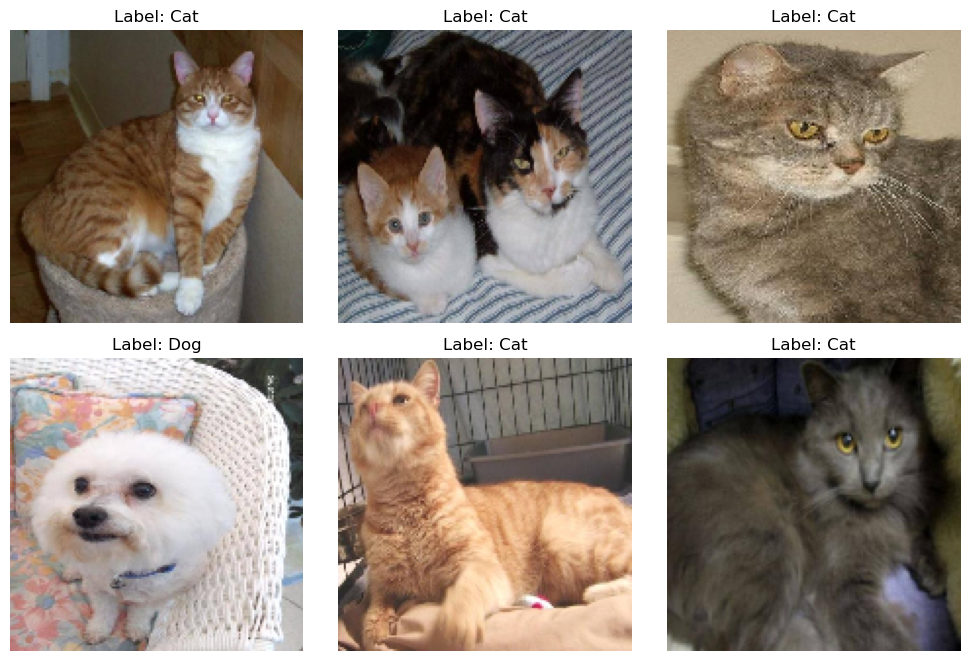

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# obtains a batch/img stash
images, labels = next(train_gen)  # "next" takes the next batch from the generator

# Shows images from batches
plt.figure(figsize=(10, 10))
for i in range(6):  # Shows first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  
    plt.title(f"Label: {'Dog' if labels[i] == 1 else 'Cat'}")
    plt.axis('off')  # Delete axes

plt.tight_layout()
plt.show()


In [5]:
# Create Sequential model
model = Sequential([
    # First conv layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second conv layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third conv layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening and de
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Regularización
    Dense(1, activation='sigmoid')  # Salida binaria
])


C:\Users\ivanp\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Configuración del entrenamiento
epochs = 50
steps_per_epoch = len(train_gen)  # Número de lotes en el conjunto de entrenamiento
validation_steps = len(valid_gen)  # Número de lotes en validación

# Entrenamiento
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=valid_gen,
    validation_steps=validation_steps
)

Epoch 1/50


C:\Users\ivanp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.5294 - loss: 0.7812 - val_accuracy: 0.6412 - val_loss: 0.6281
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50


C:\Users\ivanp\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


197/197 ━━━━━━━━━━━━━━━━━━━━ 145s 733ms/step - accuracy: 0.6928 - loss: 0.5863 - val_accuracy: 0.6869 - val_loss: 0.5709
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 146s 737ms/step - accuracy: 0.7788 - loss: 0.4661 - val_accuracy: 0.7550 - val_loss: 0.5071
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 146s 736ms/step - accuracy: 0.8410 - loss: 0.3540 - val_accuracy: 0.7458 - val_loss: 0.5440
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 145s 730ms/step - accuracy: 0.9034 - loss: 0.2301 - val_accuracy: 0.7458 - val_loss: 0.6401
Epoch 10/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 57us

In [9]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 598ms/step - accuracy: 0.7733 - loss: 1.6855
Pérdida en el conjunto de prueba: 1.7323
Precisión en el conjunto de prueba: 0.7791


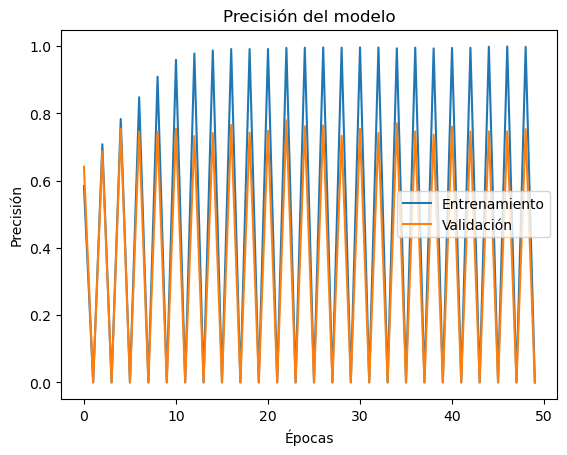

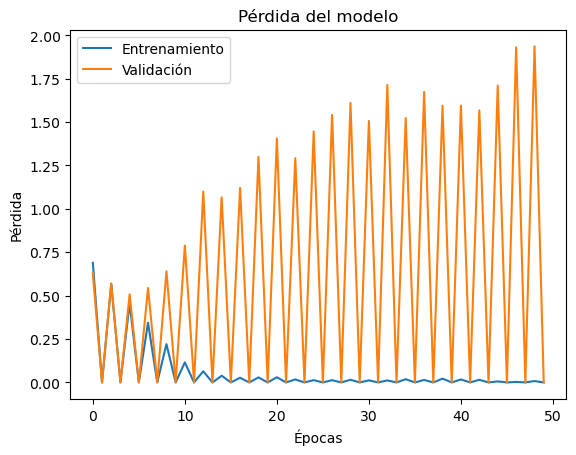

In [10]:

# Precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [15]:
model.save('cat_dog_classifier.h5')

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


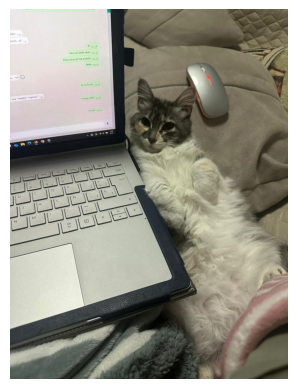

Esto es un: Gato
Porcentaje perruno: 0.011859824880957603 %


In [11]:
# Cargar y preprocesar una imagen
img_path = r'X:\CODING\PROJECTS\CAT_DOG\predictions\tequi.jpg'
img = load_img(img_path, target_size=(150, 150))  # Redimensionar
img_array = img_to_array(img) / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para batch

# Predicción
prediction = model.predict(img_array)
class_label = 'Perro' if prediction[0][0] > 0.5 else 'Gato'


img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()
print(f"Esto es un: {class_label}")
print(f'Porcentaje perruno: {prediction[0][0]} %')



In [12]:
print(train_gen.class_indices)

{'cat': 0, 'dog': 1}
